In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn import metrics
import time
import copy
import sys

In [19]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum(point1 - point2)**2)

In [20]:
def get_sil_score(data, labels):
    return metrics.silhouette_score(data, labels, metric='euclidean')

In [21]:
class kMeans:
    
    def __init__(self, k=2, max_iters=100, threshold=0):
        self.k = k
        self.max_iters = max_iters
        self.threshold = threshold
        self.counts = np.zeros(self.k)
        self.centroids = [[] for _ in range(self.k)]

    def fit(self, data):

        feat_size = len(data[0]) - 2 # this assumes that the last two features are time index and number of cars
        number_of_samples = len(data)

#         self.centroids = np.zeros(self.k, feat_size)
        
        labels = np.zeros(number_of_samples)
        
        random_centroids = np.random.choice(number_of_samples, self.k, replace = False)
        # init the centroids
        for index in range(self.k):
            self.centroids[index] = data[random_centroids[index], :-2]

        for iteration in range(self.max_iters):
            centroids_old = copy.deepcopy(self.centroids)
            distance_instance_to_clusters = np.zeros((number_of_samples, self.k))
            
            for instance in range(number_of_samples):
                for cluster in range(self.k):
                    distance_instance_to_clusters[instance, cluster] = euclidean_distance(k_np[instance, :-2], self.centroids[cluster])
                # choose closets cluster for that instance
                labels[instance] = np.argmin(distance_instance_to_clusters[instance])
            
            for i in range(self.k):
                self.clusters = data[labels==i, :-2]
                self.centroids[i] = np.mean(self.clusters, axis=0)
            
            centroid_distances = [euclidean_distance(centroids_old[i], self.centroids[i]) for i in range(self.k)]
            
            if sum(centroid_distances) <= self.threshold:
#                 print(f'Converged somehow (?) at iter {iteration+1}')
                break
        return 
        
    def predict(self, data):
        distance_instance_to_clusters = np.zeros((len(data), self.k))
        labels = np.zeros(len(data))
        for instance in range(len(data)):
            for cluster in range(self.k):
                distance_instance_to_clusters[instance, cluster] = euclidean_distance(data[instance, :-2], self.centroids[cluster])
            labels[instance] = np.argmin(distance_instance_to_clusters[instance])
        return labels
    
    def partial_fit(self, data, plot_partial_fit=False):
        new_labels = np.zeros(len(data))
        for indx in range(len(data)):
            new_labels[indx] = self.fit_instance(data[indx])
    
    def fit_instance(self, instance):
        distance_instance_to_clusters = np.zeros(self.k)
        for i in range(self.k):
            distance_instance_to_clusters[i] = euclidean_distance(self.centroids[i], instance[:-2])
        label = np.argmin(distance_instance_to_clusters)
        self.counts[label] += 1
        self.centroids[label] = self.centroids[label] + (1 / self.counts[label]) * (instance[:-2] - self.centroids[label])
        return label
    
        

In [22]:
df = pd.read_csv('data.csv')

data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
# data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()
# data_split_modified_z_12 = data_split_modified_z.to_numpy()


# """ SIZE 12 """
data_split_modified_z_12 = np.split(data_split_modified_z, 16)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
#     print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

# data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)

In [23]:
k_np = data_split_modified_z_12[0] # this numpy array is used for the initial k-means
list_of_dfs_rest = data_split_modified_z_12[1:] # this data will be clustered using sequential k-means
list_of_dfs_rest_con= np.concatenate(list_of_dfs_rest, axis=0)


In [24]:
list_of_nmpys_for_graphs = []
removed_outliers_numpy = []
labels_dict = {}

In [25]:
list_of_nmpys_for_graphs = []
data = []
labels_dict = {}
fit_number = 1

model_2 = kMeans(k = 2)

model_2.fit(k_np)
labels = model_2.predict(k_np)
print(get_sil_score(k_np, labels))

data = k_np


for set_df in list_of_dfs_rest:
    fit_number +=1
    model_2.partial_fit(set_df)
    data = np.concatenate([k_np, set_df], axis=0)
    labels = model_2.predict(data)
    try:
        print(get_sil_score(data, labels))
    except:
        print('0')


0.5228296786034643
0.5055310633518825
0.7509422522497741
0
0.718134304547932
0
0.5484578760772985
0.7685953550211211
0.5754967421673298
0.4917337813027187
0.6429533475014163
0.6997675195308667
0.5981617305958138
0.41393265974060045
0.4583744605467819
0.41716501006545226


In [26]:
time_array = []
for i in range(100):
    start_time = time.time()
    model = kMeans(k=k)
    model.fit(k_np)
    for set_df in list_of_dfs_rest:
        new_data = set_df
        model.partial_fit(new_data)
        label = model.predict(new_data)
    labels = model.predict(list_of_dfs_rest_con)
    end_time = time.time()
    timing = end_time-start_time
    time_array.append(timing)
#     print(timing)
print(np.average(time_array))

0.11795984745025635


In [55]:
start_time = time.time()
list_of_nmpys_for_graphs = []
removed_outliers_numpy = []
labels_dict = {}

model = kMeans(k=2)
model.fit(k_np)
fit_number = 1

removed_outliers_numpy.append(k_np)
new_nmpy = np.concatenate(removed_outliers_numpy, axis=0)

labels_dict[f'fit_{fit_number}'] = model.predict(new_nmpy)
list_of_nmpys_for_graphs.append(new_nmpy)

for set_df in list_of_dfs_rest:
    fit_number +=1
    new_data = set_df
    model.partial_fit(new_data)
    
    removed_outliers_numpy.append(set_df)
    new_nmpy = np.concatenate(removed_outliers_numpy, axis=0)
    labels_dict[f'fit_{fit_number}'] = model.predict(new_nmpy)
    list_of_nmpys_for_graphs.append(new_nmpy)

end_time = time.time()
print(str(end_time-start_time))

0.06587052345275879


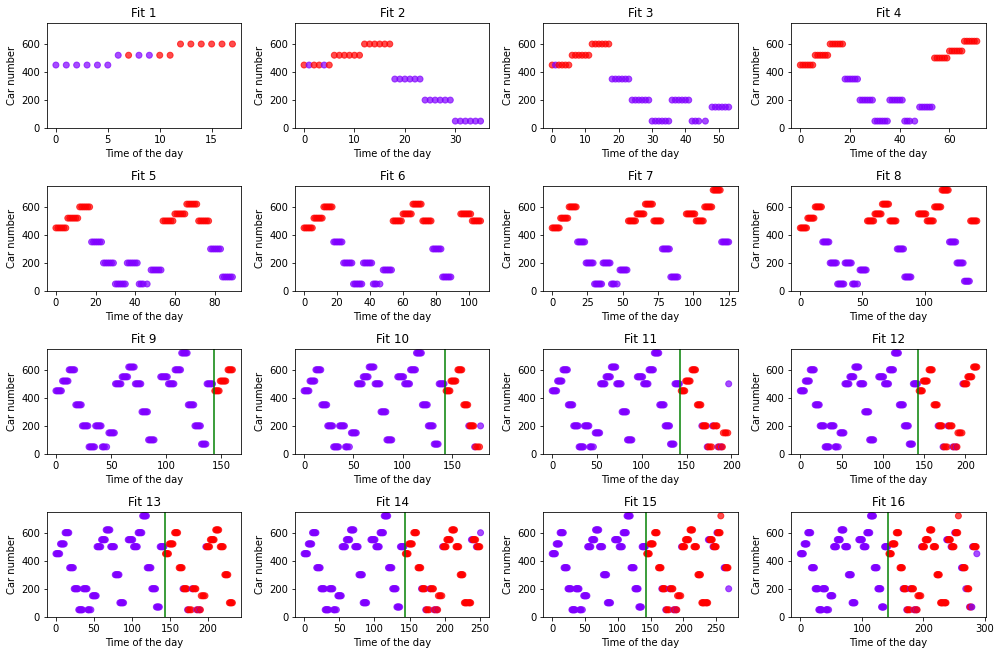

In [57]:
col_counter = 0
row_counter = 0

fit_number = 1

nrows = 4
ncols = 4

figure, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(14,10
                                                            ))

for i in list_of_nmpys_for_graphs:
    
#     numpy_array = i.to_numpy()
    
    figure.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    axs[row_counter,col_counter].scatter(i[:, 5], i[:, 4], c =labels_dict[f'fit_{fit_number}'], cmap='rainbow', alpha=0.7 )
    axs[row_counter,col_counter].set_xlabel('Time of the day')
    axs[row_counter,col_counter].set_ylim(0, 750)
    axs[row_counter,col_counter].set_ylabel('Car number')
    axs[row_counter,col_counter].set_title(f'Fit {fit_number}')
    
    if fit_number >= 9:
        axs[row_counter,col_counter].axvline(x=143, color='g')
    if col_counter == (ncols-1):
        col_counter = 0
        row_counter += 1
    else:
        col_counter += 1
    
    fit_number += 1

In [ ]:
import wandb
wandb.init(project="clustering_sequential_k_means", name='test_run')
model = kMeans(k=k)
model.fit(k_np)
for set_df in list_of_dfs_rest:
        new_data = set_df
        model.partial_fit(new_data)
        label = model.predict(new_data)
labels = model.predict(list_of_dfs_rest_con)
# wandb.plot_clusterer(model, list_of_dfs_rest_con[:, :-2], labels, labels=None, model_name=model_name)

In [58]:
sys.getsizeof(model)

56